In [37]:
import pandas as pd
import nltk
from collections import Counter
from nltk.corpus import brown
from nltk import UnigramTagger as ut
import matplotlib.pyplot as plt

In [3]:
post23 = pd.read_csv('./Oct15_post23bio.tsv', sep='\t')

In [4]:
pre23 = pd.read_csv('./Oct15_pre23bio.tsv', sep='\t')

In [7]:
bio = pd.concat([pre23, post23], ignore_index=True)

In [7]:
# bio.to_csv('./Oct15_bio.tsv', sep='\t', index=False)

In [8]:
bio.head()

,docid,charname,charid,chargender,authgender,pubdate,words
0,yale.39002005473021,BaronShibusawa,yale.39002005473021|BaronShibusawa,m,m,1920,agent-is agent-has agent-given agent-does agen...
1,uc2.ark+=13960=t3222sv4b,LordSalisbury,uc2.ark+=13960=t3222sv4b|LordSalisbury,m,f,1907,agent-wrote agent-says agent-succeeded agent-o...
2,uc2.ark+=13960=t3222sv4b,Nicholas,uc2.ark+=13960=t3222sv4b|Nicholas,m,f,1907,agent-liked agent-says agent-was agent-worked ...
3,uc2.ark+=13960=t3222sv4b,Mr.GathorneHardy,uc2.ark+=13960=t3222sv4b|Mr.GathorneHardy,m,f,1907,agent-put agent-made agent-were agent-recognis...
4,uc2.ark+=13960=t3222sv4b,Wilberforce,uc2.ark+=13960=t3222sv4b|Wilberforce,m,f,1907,agent-held agent-foresaw agent-had poss-life p...


In [9]:
print(post23.shape)
print(pre23.shape)
print(bio.shape)

(515872, 7)
(855434, 7)
(1371306, 7)


In [10]:
pd.set_option('max_colwidth', 500)
bio.words[:5]

0                                                                                                                       agent-is agent-has agent-given agent-does agent-takes agent-explained agent-trying agent-thinks agent-get agent-have agent-sent agent-feared poss-theory poss-money poss-influenza mod-confucianist mod-desirous
1                                    agent-wrote agent-says agent-succeeded agent-offered agent-wrote agent-made agent-returned agent-ceased agent-selected agent-see poss-brother poss-government poss-offer poss-cousin poss-post poss-title poss-government poss-instructions patient-chosen patient-informing said-peace said-honour
2                                                                                                                                                                                                         agent-liked agent-says agent-was agent-worked poss-sister poss-letters poss-family poss-sister said-liked said-seen said-heard
3            

In [11]:
# tuples (tag, word)
# [tuple(item.split('-')) for sublist in bio.words[:5].str.split() for item in sublist]

# just words
# [item.split('-')[1] for sublist in bio.words[:5].str.split() for item in sublist]

# just tags
# [item.split('-')[0] for sublist in bio.words[:5].str.split() for item in sublist]

# one big dict
# for k, v in [tuple(item.split('-')) for sublist in bio.words[:5].str.split() for item in sublist]:
#     d[k].append(v)

from collections import defaultdict

def pos_to_dict(words_str):
    d = defaultdict( list )
    try:
        for k, v in [ tuple(item.split('-')) for item in words_str.split() ]:
            d[k].append(v)
    except (ValueError):
        # where the word has multiple hyphens, split off only the first one as the pos key
        for k, v in [ (item.split('-')[0], item[len(item.split('-')[0])+1:]) for item in words_str.split() ]:
            d[k].append(v)
    except (AttributeError, TypeError):
        return words_str
    return d

bio['words'] = bio['words'].apply(pos_to_dict)

In [13]:
def count_pos(pos_dict):
    d = { k:len(v) for k, v in pos_dict.items() }
    return d

bio['count_pos'] = bio['words'].apply(count_pos)

In [20]:
bio.head(10)

,docid,charname,charid,chargender,authgender,pubdate,words,count_pos
0,yale.39002005473021,BaronShibusawa,yale.39002005473021|BaronShibusawa,m,m,1920,"{'agent': ['is', 'has', 'given', 'does', 'takes', 'explained', 'trying', 'thinks', 'get', 'have', 'sent', 'feared'], 'poss': ['theory', 'money', 'influenza'], 'mod': ['confucianist', 'desirous']}","{'agent': 12, 'poss': 3, 'mod': 2}"
1,uc2.ark+=13960=t3222sv4b,LordSalisbury,uc2.ark+=13960=t3222sv4b|LordSalisbury,m,f,1907,"{'agent': ['wrote', 'says', 'succeeded', 'offered', 'wrote', 'made', 'returned', 'ceased', 'selected', 'see'], 'poss': ['brother', 'government', 'offer', 'cousin', 'post', 'title', 'government', 'instructions'], 'patient': ['chosen', 'informing'], 'said': ['peace', 'honour']}","{'agent': 10, 'poss': 8, 'patient': 2, 'said': 2}"
2,uc2.ark+=13960=t3222sv4b,Nicholas,uc2.ark+=13960=t3222sv4b|Nicholas,m,f,1907,"{'agent': ['liked', 'says', 'was', 'worked'], 'poss': ['sister', 'letters', 'family', 'sister'], 'said': ['liked', 'seen', 'heard']}","{'agent': 4, 'poss': 4, 'said': 3}"
3,uc2.ark+=13960=t3222sv4b,Mr.GathorneHardy,uc2.ark+=13960=t3222sv4b|Mr.GathorneHardy,m,f,1907,"{'agent': ['put', 'made', 'were', 'recognised', 'considered', 'maintained'], 'poss': ['reply'], 'patient': ['furnished', 'entered', 'raised', 'replaced'], 'said': ['emergency']}","{'agent': 6, 'poss': 1, 'patient': 4, 'said': 1}"
4,uc2.ark+=13960=t3222sv4b,Wilberforce,uc2.ark+=13960=t3222sv4b|Wilberforce,m,f,1907,"{'agent': ['held', 'foresaw', 'had'], 'poss': ['life', 'estates', 'mind'], 'mod': ['promoter'], 'said': ['hearts', 'retire', 'often', 'littleness', 'common', 'greatness', 'god', 'presence', 'mercy', 'grow', 'day', 'day', 'nobleness', 'aim', 'quick', 'steadiness', 'purpose', 'greatness', 'conduct', 'makes']}","{'agent': 3, 'poss': 3, 'mod': 1, 'said': 20}"
5,uc2.ark+=13960=t3222sv4b,LordBeaconsfield,uc2.ark+=13960=t3222sv4b|LordBeaconsfield,m,f,1907,"{'agent': ['shown', 'offered', 'making', 'tendered', 'wrote', 'looked', 'shown', 'offered', 'making', 'tendered', 'wrote', 'looked'], 'poss': ['judgement', 'accepting', 'resignation', 'successor', 'gladstone', 'engagement', 'life', 'host', 'party', 'judgement', 'accepting', 'resignation', 'successor', 'gladstone', 'engagement', 'life', 'host', 'party'], 'patient': ['summoned', 'showed', 'summoned', 'showed'], 'said': ['obliged', 'forego', 'honour', 'pleasure', 'guest', 'obliged', 'forego', '...","{'agent': 12, 'poss': 18, 'patient': 4, 'said': 20}"
6,uc2.ark+=13960=t3222sv4b,Bob,uc2.ark+=13960=t3222sv4b|Bob,m,f,1907,"{'agent': ['looking', 'brings', 'has', 'seems', 'approve', 'carried', 'was', 'make', 'looked', 'came', 'wished', 'won', 'disarmed', 'do', 'get', 'got', 'bought', 'done', 'be'], 'poss': ['career', 'forehead', 'mouth', 'movements', 'companions', 'family', 'beauty', 'sergeant', 'father', 'permission'], 'mod': ['slender', 'graceful', 'quiet', 'sarcastic', 'calm', 'person'], 'patient': ['love', 'saw', 'marked', 'saves', 'carried', 'thanking', 'assuring']}","{'agent': 19, 'poss': 10, 'mod': 6, 'patient': 7}"
7,uc2.ark+=13960=t3222sv4b,Earl,uc2.ark+=13960=t3222sv4b|Earl,m,f,1907,"{'agent': ['sold', 'came', 'resigned', 'pass'], 'poss': ['marriage', 'mines', 'brother', 'history', 'crimea'], 'said': ['history', 'lives', 'lindsays', 'christian', 'art']}","{'agent': 4, 'poss': 5, 'said': 5}"
8,uc2.ark+=13960=t3222sv4b,Committee,uc2.ark+=13960=t3222sv4b|Committee,u,f,1907,"{'agent': ['made', 'decided', 'directed', 'consider', 'attributed', 'is'], 'patient': ['had'], 'said': ['terms', 'conditions', 'service', 'army']}","{'agent': 6, 'patient': 1, 'said': 4}"
9,uc2.ark+=13960=t3222sv4b,FrederickStephenson,uc2.ark+=13960=t3222sv4b|FrederickStephenson,m,f,1907,"{'agent': ['join', 'took', 'invalided', 'was', 'have', 'pitched', 'loved', 'coming'], 'poss': ['officers', 'senior', 'friend', 'regiment', 'father', 'regiment', 'father', 'country', 'career', 'richmond'], 'mod': ['adjutant'], 'patient': ['telling', 'include', 'invalided', 'exhausted', 'wel

## Questions:
- are the relative frequency of verbs associated with male characters higher?
    - verbs: agent (object), patient (passive)
    - nouns: mod, poss
- for feminine and masuline characters are there different ratios for those roles 
    - (agent-patient of verb), (poss-mod of noun)
- 'up, down, away, there, again'
    - poss role? or mod role?

In [21]:
from collections import Counter

def get_counts(df):
    c = Counter()
    for idx, row in df['count_pos'].items():
        c.update(row)
    return c

In [27]:
all_counts = get_counts(bio)

In [22]:
male_char_counts = get_counts(bio.loc[bio.chargender == 'm',:])
female_char_counts = get_counts(bio.loc[bio.chargender == 'f',:])

In [33]:
male_auth_counts = get_counts(bio.loc[bio.authgender == 'm',:])
female_auth_counts = get_counts(bio.loc[bio.authgender == 'f',:])

In [27]:
male_char_counts

Counter({'agent': 31365088,
         'lll>': 1,
         'mod': 2593052,
         'patient': 6141017,
         'poss': 21493348,
         'said': 28788655,
         'tho': 1,
         'to': 1})

#### Is the relative frequency of verbs associated with male characters higher?

In [154]:
print('relative % of verbs associated with male characters', (male_char_counts['agent'] 
                                                              + male_char_counts['patient']) 
      / (male_char_counts['agent'] 
         + male_char_counts['patient'] 
         + male_char_counts['mod'] 
         + male_char_counts['poss'] 
         + male_char_counts['said'])
     )
print('relative % of verbs associated with female characters', (female_char_counts['agent'] 
                                                                + female_char_counts['patient']) 
      / (female_char_counts['agent'] 
         + female_char_counts['patient'] 
         + female_char_counts['mod'] 
         + female_char_counts['poss'] 
         + female_char_counts['said'])
     )

relative % of verbs associated with male characters 0.41497702618554577
relative % of verbs associated with female characters 0.4330731659372056


#### Percentage of verbs that are active

In [158]:
print('% of verbs describing men that are active verbs', (male_char_counts['agent'] 
                                                          / (male_char_counts['agent'] 
                                                             + male_char_counts['patient'])
                                                         ))

print('% of verbs describing women that are active verbs', (female_char_counts['agent'] 
                                                            / (female_char_counts['agent'] 
                                                               + female_char_counts['patient'])
                                                           ))

% of verbs describing men that are active verbs 0.8362662025288949
% of verbs describing women that are active verbs 0.8437637681994732


#### Percentage of nouns that are possessive

In [159]:
print('% of nouns describing men that are possessive nouns', (male_char_counts['poss'] 
                                                              / (male_char_counts['poss'] 
                                                                 + male_char_counts['mod'])
                                                             ))

print('% of nouns describing women that are possessive nouns', (female_char_counts['poss'] 
                                                                / (female_char_counts['poss'] 
                                                                   + female_char_counts['mod'])
                                                               ))

% of nouns describing men that are possessive nouns 0.8923437292413976
% of nouns describing women that are possessive nouns 0.8992377751419598


#### Is the relative frequency of dialogue words associated with male characters higher?

In [160]:
print('relative % of dialog words assocatied with male characters', (male_char_counts['said']) 
      / (male_char_counts['agent'] 
         + male_char_counts['patient'] 
         + male_char_counts['mod'] 
         + male_char_counts['poss'] 
         + male_char_counts['said'])
     )
print('relative % of dialog words associated with female characters', (female_char_counts['said']) 
      / (female_char_counts['agent'] 
         + female_char_counts['patient'] 
         + female_char_counts['mod'] 
         + female_char_counts['poss'] 
         + female_char_counts['said'] )
     )

relative % of dialog words assocatied with male characters 0.3185249558646957
relative % of dialog words associated with female characters 0.28209319761216356


- what are the verbs being used most by woman? (authored)
    - verbs: agent (object), patient (passive)
    - nouns: mod, poss
    

- plot by year:
 - % of verbs describing women that are active verbs
 - % of verbs describing men that are active verbs


- raw data of character sizes
 - plotting trend over time 


path, '/projects/ischoolichass/ichass/usesofscale/chardata'

In [31]:
all_by_year = bio.groupby('pubdate').apply(get_counts)

pubdate
0                           {'agent': 1185, 'poss': 838, 'mod': 60, 'patient': 179, 'said': 1864}
1701                         {'agent': 909, 'poss': 374, 'mod': 52, 'patient': 155, 'said': 1329}
1705                           {'agent': 452, 'poss': 423, 'patient': 96, 'said': 525, 'mod': 29}
1706                            {'agent': 110, 'poss': 174, 'patient': 38, 'mod': 10, 'said': 35}
1714                       {'agent': 1930, 'patient': 314, 'poss': 849, 'mod': 108, 'said': 2045}
1715                                                                      {'agent': 7, 'poss': 6}
1717                         {'agent': 571, 'patient': 108, 'said': 1401, 'poss': 277, 'mod': 37}
1719                              {'agent': 97, 'poss': 92, 'mod': 5, 'patient': 29, 'said': 143}
1720                            {'agent': 113, 'poss': 127, 'mod': 8, 'patient': 26, 'said': 405}
1726                                             {'agent': 8, 'poss': 14, 'mod': 1, 'patient': 1}
1732        

In [35]:
type(all_by_year)

pandas.core.series.Series

In [46]:
# restructure dictionary Counter object into Pandas DataFrame
all_by_year = all_by_year.apply(pd.Series).fillna(0)

In [51]:
# drop messy error columns
all_by_year = all_by_year.drop(['>', 'lll>', 'tho', 'to'], axis=1)

In [55]:
all_by_year.head()

,agent,mod,patient,poss,said
pubdate,,,,,
0,1185.0,60.0,179.0,838.0,1864.0
1701,909.0,52.0,155.0,374.0,1329.0
1705,452.0,29.0,96.0,423.0,525.0
1706,110.0,10.0,38.0,174.0,35.0
1714,1930.0,108.0,314.0,849.0,2045.0


In [57]:
# drop year 0??
# this must mean the pubdate is unknown
all_by_year = all_by_year.drop(0)
all_by_year.head()

,agent,mod,patient,poss,said
pubdate,,,,,
1701,909.0,52.0,155.0,374.0,1329.0
1705,452.0,29.0,96.0,423.0,525.0
1706,110.0,10.0,38.0,174.0,35.0
1714,1930.0,108.0,314.0,849.0,2045.0
1715,7.0,0.0,0.0,6.0,0.0


### Plotting raw word counts associated with characters by year

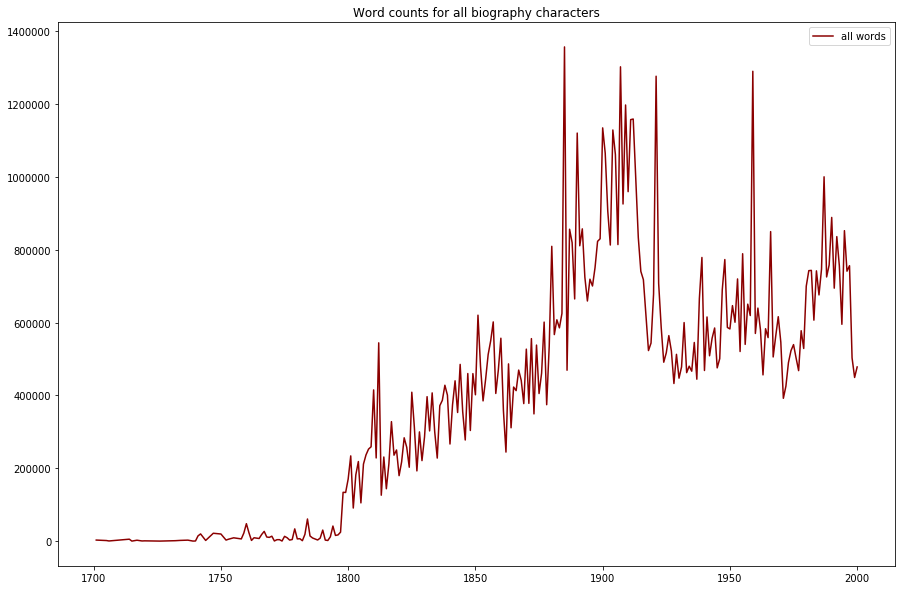

In [102]:
plt.figure(figsize=(15,10))
plt.plot(all_by_year.index, all_by_year.sum(axis=1), label='all words', color='darkred')
plt.title('Word counts for all biography characters')
plt.legend()
plt.show()

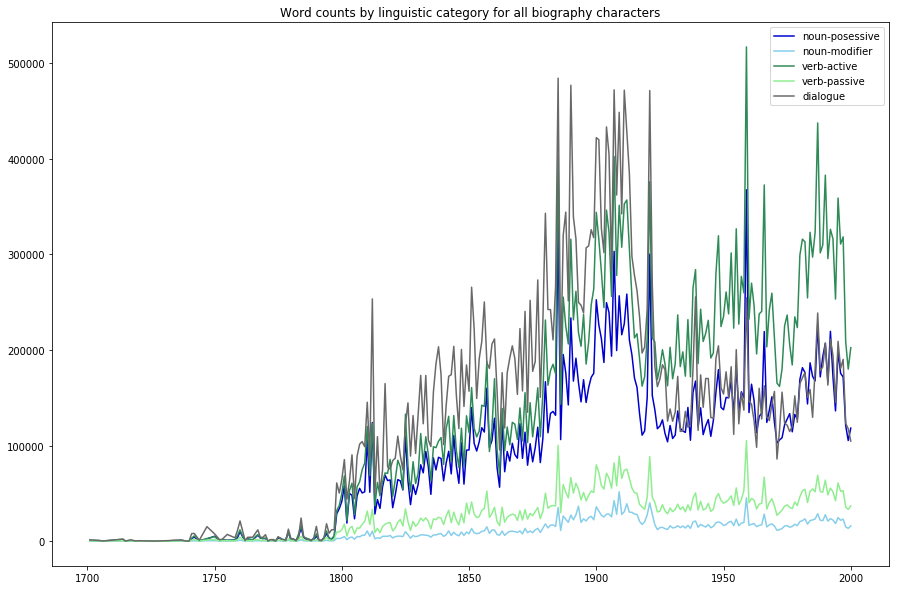

In [142]:
plt.figure(figsize=(15,10))
plt.plot(all_by_year.index, all_by_year['poss'], label='noun-posessive', color='mediumblue')
plt.plot(all_by_year.index, all_by_year['mod'], label='noun-modifier', color='skyblue')
plt.plot(all_by_year.index, all_by_year['agent'], label='verb-active', color='seagreen')
plt.plot(all_by_year.index, all_by_year['patient'], label='verb-passive', color='lightgreen')
plt.plot(all_by_year.index, all_by_year['said'], label='dialogue', color='dimgrey')
plt.title('Word counts by linguistic category for all biography characters')
plt.legend()
plt.savefig('./raw_word_counts')
plt.show()

### plotting relative frequencies by gender
- plot by year:
 - % of verbs describing women that are active verbs
 - % of verbs describing men that are active verbs

In [103]:
all_by_gender_yr = bio.groupby(['pubdate', 'chargender']).apply(get_counts)

In [104]:
all_by_gender_yr.head()

pubdate  chargender
0        f                                    {'agent': 15, 'poss': 7, 'mod': 3, 'said': 37}
         m             {'agent': 1169, 'poss': 828, 'mod': 57, 'patient': 179, 'said': 1784}
         u                                               {'poss': 3, 'said': 43, 'agent': 1}
1701     m               {'agent': 883, 'poss': 370, 'mod': 49, 'patient': 144, 'said': 713}
         u                    {'agent': 26, 'patient': 11, 'said': 616, 'mod': 3, 'poss': 4}
dtype: object

In [105]:
all_by_gender_yr = all_by_gender_yr.apply(pd.Series).fillna(0)
all_by_gender_yr.head()

>   agent  lll>   mod  patient   poss    said  tho   to
pubdate chargender                                                           
0       f           0.0    15.0   0.0   3.0      0.0    7.0    37.0  0.0  0.0
        m           0.0  1169.0   0.0  57.0    179.0  828.0  1784.0  0.0  0.0
        u           0.0     1.0   0.0   0.0      0.0    3.0    43.0  0.0  0.0
1701    m           0.0   883.0   0.0  49.0    144.0  370.0   713.0  0.0  0.0
        u           0.0    26.0   0.0   3.0     11.0    4.0   616.0  0.0  0.0

In [109]:
# drop messy error columns
all_by_gender_yr = all_by_gender_yr.drop(['>', 'lll>', 'tho', 'to'], axis=1)
all_by_gender_yr = all_by_gender_yr.drop(0)
all_by_gender_yr.head()

agent   mod  patient   poss   said
pubdate chargender                                    
1701    m           883.0  49.0    144.0  370.0  713.0
        u            26.0   3.0     11.0    4.0  616.0
1705    m           436.0  29.0     90.0  423.0  239.0
        u            16.0   0.0      6.0    0.0  286.0
1706    f            18.0   0.0      7.0   32.0    0.0

In [162]:
all_by_gender_yr.loc[
    all_by_gender_yr.index.get_level_values('chargender') == 'm', 
].head()

,,agent,mod,patient,poss,said
pubdate,chargender,,,,,
1701,m,883.0,49.0,144.0,370.0,713.0
1705,m,436.0,29.0,90.0,423.0,239.0
1706,m,92.0,10.0,31.0,142.0,35.0
1714,m,1912.0,106.0,281.0,841.0,1937.0
1715,m,7.0,0.0,0.0,6.0,0.0


In [166]:
prcnt_dialogue_m = all_by_gender_yr.loc[
    all_by_gender_yr.index.get_level_values('chargender') == 'm', 'said'
] / all_by_gender_yr.loc[
    all_by_gender_yr.index.get_level_values('chargender') == 'm'].sum(axis=1)

prcnt_dialogue_f = all_by_gender_yr.loc[
    all_by_gender_yr.index.get_level_values('chargender') == 'f', 'said'
] / all_by_gender_yr.loc[
    all_by_gender_yr.index.get_level_values('chargender') == 'f'].sum(axis=1)

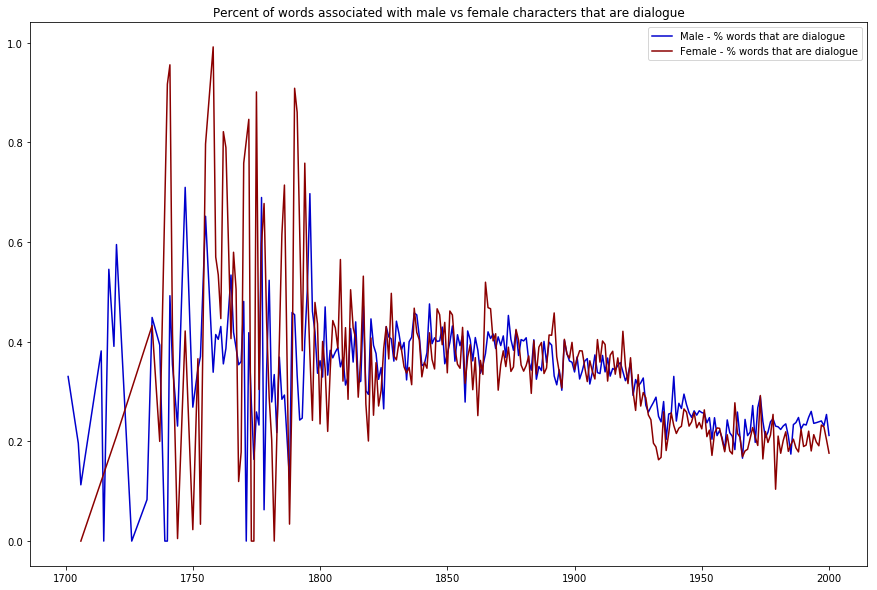

In [169]:
plt.figure(figsize=(15,10))
plt.plot(prcnt_dialogue_m.index.get_level_values('pubdate'), 
         prcnt_dialogue_m, label='Male - % words that are dialogue', color='mediumblue')
plt.plot(prcnt_dialogue_f.index.get_level_values('pubdate'), 
         prcnt_dialogue_f, label='Female - % words that are dialogue', color='darkred')
plt.title('Percent of words associated with male vs female characters that are dialogue')
plt.legend()
plt.savefig('./prcnt_dialogue')
plt.show()

In [132]:
prcnt_active_f = all_by_gender_yr.loc[
    all_by_gender_yr.index.get_level_values('chargender') == 'f', 'agent'
] / (all_by_gender_yr.loc[
    all_by_gender_yr.index.get_level_values('chargender') == 'f', 'agent'
] + all_by_gender_yr.loc[
    all_by_gender_yr.index.get_level_values('chargender') == 'f', 'patient'
])

In [133]:
prcnt_active_m = all_by_gender_yr.loc[
    all_by_gender_yr.index.get_level_values('chargender') == 'm', 'agent'
] / (all_by_gender_yr.loc[
    all_by_gender_yr.index.get_level_values('chargender') == 'm', 'agent'
] + all_by_gender_yr.loc[
    all_by_gender_yr.index.get_level_values('chargender') == 'm', 'patient'
])

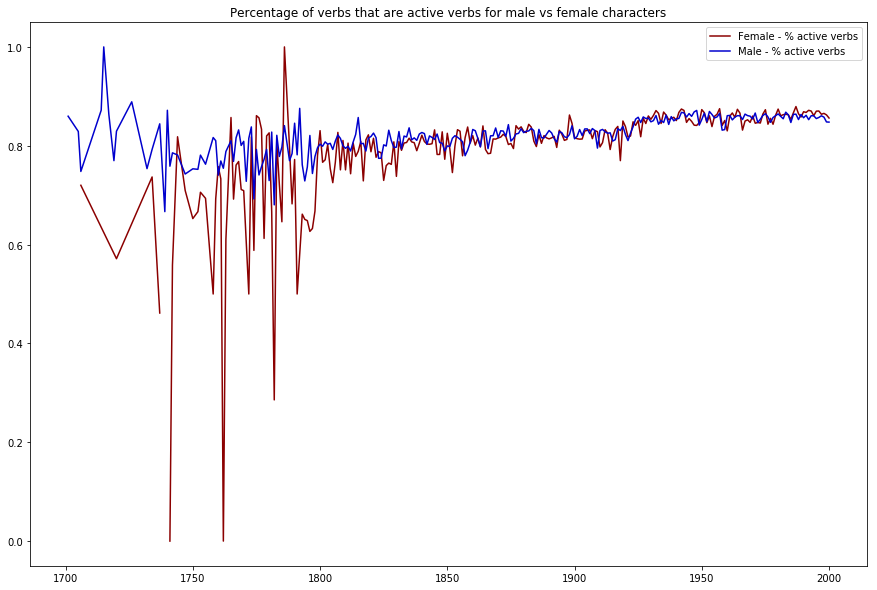

In [141]:
plt.figure(figsize=(15,10))
plt.plot(prcnt_active_f.index.get_level_values('pubdate'), 
         prcnt_active_f,
         label='Female - % active verbs', color='darkred')
plt.plot(prcnt_active_m.index.get_level_values('pubdate'), 
         prcnt_active_m,
         label='Male - % active verbs', color='mediumblue')
plt.title('Percentage of verbs that are active verbs for male vs female characters')
plt.legend()
plt.savefig('./prcnt_active_verbs')
plt.show()

In [149]:
prcnt_poss_f = all_by_gender_yr.loc[
    all_by_gender_yr.index.get_level_values('chargender') == 'f', 'poss'
] / (all_by_gender_yr.loc[
    all_by_gender_yr.index.get_level_values('chargender') == 'f', 'poss'
] + all_by_gender_yr.loc[
    all_by_gender_yr.index.get_level_values('chargender') == 'f', 'mod'
])

prcnt_poss_m = all_by_gender_yr.loc[
    all_by_gender_yr.index.get_level_values('chargender') == 'm', 'poss'
] / (all_by_gender_yr.loc[
    all_by_gender_yr.index.get_level_values('chargender') == 'm', 'poss'
] + all_by_gender_yr.loc[
    all_by_gender_yr.index.get_level_values('chargender') == 'm', 'mod'
])

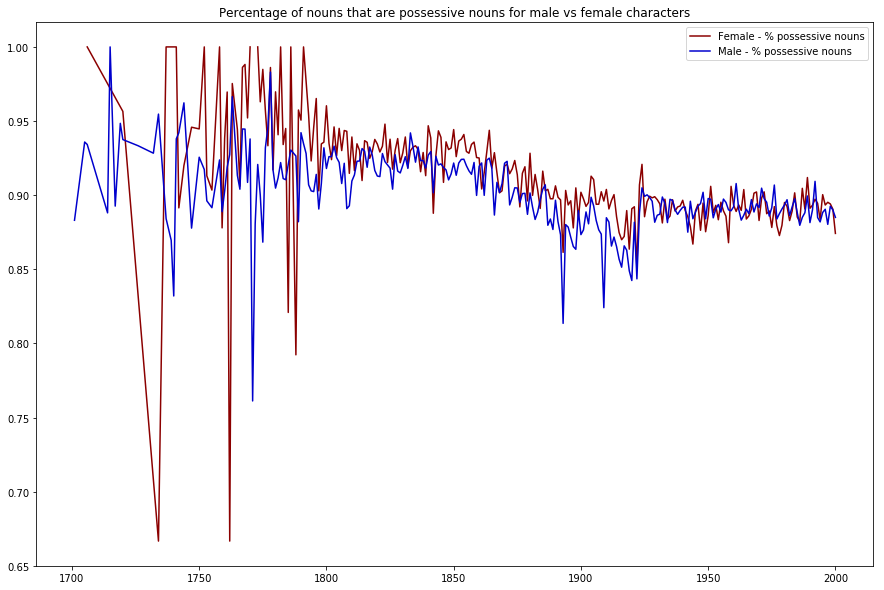

In [151]:
plt.figure(figsize=(15,10))
plt.plot(prcnt_poss_f.index.get_level_values('pubdate'), 
         prcnt_poss_f,
         label='Female - % possessive nouns', color='darkred')
plt.plot(prcnt_poss_m.index.get_level_values('pubdate'), 
         prcnt_poss_m,
         label='Male - % possessive nouns', color='mediumblue')
plt.title('Percentage of nouns that are possessive nouns for male vs female characters')
plt.legend()
plt.savefig('./prcnt_poss_nouns')
plt.show()

### Get the raw counts of present vs past tense, in bio
#### import and train the Unigram Tagger 
    - this POS tagger is meant to work with words out of context
    - we have "agent" vs "patient" tags but not "past-tense" vs "present-tense"

In [ ]:
brown_sents = brown.tagged_sents()
# Split the data into train and test sets.
train = int(len(brown_sents)*90/100) # use 90% for training
# Trains the tagger
uni_tag = ut(brown_sents[:train]) # this will take some time, ~1-2 mins
# evaluate on 10%
uni_tag.evaluate(brown_sents[train+1:]) # will also take ~1-2 mins
# Tags a random sentence
#uni_tag.tag("this is a foo bar sentence .".split())

In [ ]:
def get_past_tense(words):
    tagged = uni_tag.tag(words)
    tagged = [list(tup) for tup in tagged]
    print(tagged)
    for word_tag in tagged:
        if word_tag[0].startswith('was-'):
            word_tag[1] = 'VBN'
    past_words = [item[0] for item in tagged if item[1] in ['VBN', 'VBD']]
    return past_words

def get_present_tense(words):
    tagged = uni_tag.tag(words)
    tagged = [list(tup) for tup in tagged]
    present_words = [item[0] for item in tagged if item[1] in ['VB','VBZ', 'VBG', 'VBP']]
    return present_words

In [ ]:
[tuple(item.split('-')) for sublist in post23.words[:5].str.split() for item in sublist]

In [ ]:
# flat_list = [item for sublist in l for item in sublist]
pre_words = [word for sublist in pre23['words'] for word in sublist.split()]

In [ ]:
pre_words[:10]

In [ ]:
post_words = [word for sublist in post23['words'] for word in sublist.split()]

In [ ]:
print(len(post_words))
print(len(pre_words))

In [ ]:
counts = Counter(post_words + pre_words)

In [ ]:
len(bio_words)

In [ ]:
len(postbio_words)

In [ ]:
Counter(words)